In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from os.path import expanduser
import re
from nltk.stem.porter import PorterStemmer

In [2]:
stop_words = [word.strip() for word in open('stop_words.txt').readlines()]

In [3]:
def stemming_tokenizer(str_input):
    porter_stemmer = PorterStemmer()
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [4]:
with open('dems.txt', 'r',encoding="utf-8") as file:
    dem_text = [line.strip('\n') for line in file]
with open('gop.txt', 'r',encoding="utf-8") as file:
    gop_text = [line.strip('\n') for line in file]
with open('NonPolitical.txt', 'r',encoding="utf-8") as file:
    nonp_text = [line.strip('\n') for line in file]

In [45]:
vectorizer = CountVectorizer(input=dem_text + gop_text+nonp_text,
                             stop_words=stop_words,
                             max_features=100,tokenizer=stemming_tokenizer)

In [46]:
dem_bow = vectorizer.fit_transform(dem_text)
gop_bow = vectorizer.fit_transform(gop_text)
nonp_bow = vectorizer.fit_transform(nonp_text)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anybodi', 'anyon', 'anyth', 'anywher', 'avail', 'balanc', 'becam', 'becaus', 'becom', 'befor', 'certainli', 'clearli', 'coverag', 'doe', 'dure', 'earli', 'evenli', 'everi', 'everybodi', 'everyon', 'everyth', 'everywher', 'f796a80b0741d338640618cb3dc2547525884e6a', 'freeli', 'fulli', 'gener', 'ha', 'head', 'hi', 'howev', 'import', 'larg', 'mani', 'manual', 'mostli', 'necessari', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'perhap', 'possibl', 'quit', 'realli', 'sever', 'sinc', 'somebodi', 'someon', 'someth', 'somewher', 'therefor', 'thi', 'thu', 'togeth', 'veri', 'wa', 'whi'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [47]:
#%%
(dem_bow.shape, gop_bow.shape, nonp_bow.shape)
#%%

((19373, 100), (18978, 100), (12913, 100))

In [48]:
x = sparse.vstack((dem_bow, gop_bow, nonp_bow))
ones = np.ones(19373)
zeros = np.zeros(18978)
twos = np.full(12913,2)
y = np.hstack((ones, zeros, twos))

In [49]:
class_names = ['Democrats','Republicans','Non-Political']

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 42) 

In [52]:
log_classifier = LogisticRegression(multi_class='multinomial',solver ='newton-cg')

In [53]:
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = log_classifier.predict(X_test)

In [55]:
log_classifier.score(X_test, y_test) 

0.912687265917603

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4313,  344,   43],
       [ 454, 4316,   69],
       [ 100,  109, 3068]])

Confusion matrix, without normalization
[[4698    2    0]
 [   2 4836    1]
 [  17    3 3257]]
Normalized confusion matrix
[[9.99574468e-01 4.25531915e-04 0.00000000e+00]
 [4.13308535e-04 9.99380037e-01 2.06654267e-04]
 [5.18767165e-03 9.15471468e-04 9.93896857e-01]]


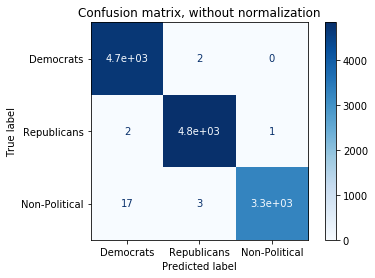

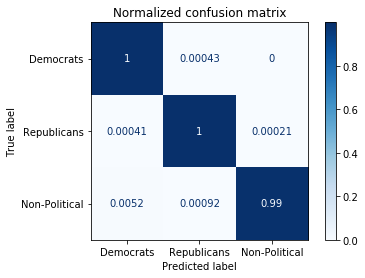

In [42]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_classifier, X_test, y_test,display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
